***

# The numpy.random package

***


![img](images/jupyter_python_numpy.width-808.png)

### What is Numpy?
[Numpy Documentation](https://numpy.org/doc/stable/docs/index.html)

NumPy, which is short for Numerical Python,  is an open source project created in 2005 by Travis Oliphant. In Python, Numpy is the fundamental library in scientific computing [1]. It forms the foundations that some of the most important data analytics (pandas) and machine learning (scikit-learn) deploy.
At the core of Numpy are multidimensional array object (ndarry) [2]. It also provides various derived objects (e.g. masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic) statistical operations, random simulation and much more [1].

#### Arrays

- An array class is called as ndarray
- The data in an ndarray must be homogeneous, i.e. all elemets contained in it must be the same type.
- They have a dtype attribute which is an object that describes the data type of the array.
- Size = the total number of elements an array contains. 
- A tuple of integers giving the size of the array along each dimension is known as shape of the array.
- Elements in Numpy arrays are accessed by using square brackets and can be initialized by using nested Python Lists
- Arrays have a ndim attribute for the number of axes or dimensions of the array [3].


##### Why Use NumPy?


NumPy arrays are stored in one continuous place in memory unlike Python lists, this makes accessing and manipulate much more efficent. This is incredibly important when working with large amounts of data. Array's also provide many more methods and functions which make working with them "easier" [4].

The advantages of using Numpy:
- Speed: NumPy uses algorithms written in C that complete in nanoseconds rather than seconds.
- Fewer loops: NumPy helps you to reduce loops and keep from getting tangled up in iteration indices.
- Clearer code: Without loops, your code will look more like the equations you’re trying to calculate.
- Better quality: There are thousands of contributors working to keep NumPy fast, friendly, and bug free. [4]

#### Getting Started

In [323]:
# Importing the libary
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Plotting
import seaborn as sns

In [324]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

  <br>




  
  </br>

## What is numpy.random?
[Documentation for numpy.random](https://numpy.org/doc/stable/reference/random/index.html#:~:text=Random%20sampling%20(%20numpy.-,random%20),Objects%20that%20generate%20random%20numbers)

Randomness has many uses in science, art, statistics, cryptography, gaming, gambling, and other fields. For example, random assignment in randomized controlled trials helps scientists to test hypotheses, and random numbers or pseudorandom numbers help video games such as video poker. Many elements of statistical practice depend on randomness via random numbers. Where those random numbers fail to be actually random, any subsequent statistical analysis may suffer from systematic bias. Elements of statistical practice that depend on randomness include: choosing a representative sample of the population being examined [5].

Random number does NOT mean a different number every time. Random means something that can not be predicted logically. numpy.random is a module in the numpy library used for arrays [6].
Numpy.random is used to create arrays of random numbers . The reason we use this “fake data'' is that it enables people to test before working with real data. It can efficiently generate arrays of sample values from many kinds of probability distributions [7].

Python has a random module, which allows for the generation of single random numbers with a few basic distributions. numpy.random has much more functionability; allowing the genration of whole arrays of random numbers, ways to work with these arrays and allows for a wider selection of probability distributions.



numpy.random can be broken into:

- Simple random data
- Permutations
- Distribution


### Switch to PCG-64


Numpy has recently updated the method it uses to generate random numbers. Previously, Numpy employed the Mersenne Twister pseudo-random number generator (MT19937) refered to as legacy random state - This method can still be used. It has updated to the Permutation Congruential generator (PCG-64) method. PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator [33]. It was developed in 2014 [34].


The Mersenne Twister was developed in 1997 by Makoto Matsumoto and Takuji Nishimura[36]. It is a which has has a period of 2^19937 before it begins repeating a squence of numbers. It works in 624 32bit vaules, where the 32bit value produced cannot be used to predict the next 32bit value. After 624 values it would repeat itself leaving the door open to hackers who where able to gather the 624 sequential values[37]. This compromises the PRNG's predictability.

On the otherhand, The Permutation Congruential generator "...has a period of 2128 and supports advancing an arbitrary number of steps as well as 2127 streams" and works in 128bits[37]. Making the PCG-64 PRNG faster, more space efficent and better statistic properties than its MT19937 counterpart. 
"The main difference between the two is that Generator relies on an additional BitGenerator to manage state and generate the random bits, which are then transformed into random values from useful distributions" [38]. 

See the below image for a full overview.

![img](images/RNG.PNG)

  <br>
  
  </br>

In [327]:
# Setting the PRNG as PCG-64
rng = np.random.default_rng()

  <br>
  
  </br>

As a result of the change over there as some changes to Simple Random Data as outlined below.

  <br>

  </br>

![image.png](images/generator_changes.PNG)

 ***
 ### Simple Random Data
 ***


#### rng.intergers()

An array of specified shape filled with random integers from low (inclusive) to high (exclusive).

In [277]:
# A Random intergr between 0 and 4
rng.integers(5)

2

In [34]:
# A random intergr between low 0 and 10 (exculsive).
rng.integers(0,10)

5

In [37]:
# A random intergr between low -10 and 10 (exculsive)
np.random.randint(-10, 10)

-6

In [36]:
# An array of 5 random intergrs between 0 (low) and 10 (exculsive).
rng.integers(0, 10, 5)

array([2, 7, 4, 1, 5], dtype=int64)

<br>
  The above is a 1D array. numpy.random also allows us to make more dimensional arrays. See examples below

In [38]:
# 2D array of random intergers 
rng.integers(low=2, size=(2,2))

array([[1, 0],
       [1, 0]], dtype=int64)

In [39]:
# 3D array of random numbers
rng.integers(0, 5, (2, 2, 2))

array([[[3, 1],
        [1, 1]],

       [[3, 0],
        [1, 2]]], dtype=int64)

### rng.random()
An array of a given shape of random (float) values between 0.0 and 1.0, including 0.0 and not 1 from a uniform distribution. The first value passed is the number of "rows" in the array. The second is the amount of values each row contains. Any, other arguments passed indicate the number of ndarrays. Deminsions should be posistive

As random.randn is not supported in PCG64 to access negative values, we must use the following formula. 
[Negative rng.random values Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

                   (b - a) * random() + a


In [281]:
# Generating an array of negative values between -3 and 0.
3 * rng.random(2) - 3

array([-2.35604563, -1.74703904])

In [40]:
# If no argument is given a single random Python float is returned.
rng.random()

0.6886538603301228

In [272]:
# Generating 4 random values. 1D array
rng.random(4)

array([0.73273411, 0.25112968, 0.19341605, 0.32384538])

In [262]:
# A 2D array containing 4 vaules each
rng.random((2,4)) 

array([[0.04669162, 0.01667684, 0.24674784, 0.86126253],
       [0.16369416, 0.6896226 , 0.24938189, 0.06558294]])

In [12]:
# We can manipulte the arrays. 
y = x * 10 # Multiplying each element in the array by 10.
y

array([[3.24888062, 1.26049539, 4.52170219, 0.2040974 ],
       [1.31875718, 2.32969728, 9.80469146, 4.87157171]])

In [242]:
# A 3D array 
rng.random((2, 2, 3))

array([[[0.43666705, 0.20325284, 0.32494264],
        [0.80621533, 0.31645209, 0.14903858]],

       [[0.69851199, 0.4485441 , 0.79893949],
        [0.23551646, 0.31978465, 0.79987953]]])

The histogram shows a uniform (rectangule) distribution. There spread of elements in each bin are similar in number.  If a smaller number was chosen the uniform shape would be less evident. See the histogram below

(array([10017.,  9868., 10083., 10075.,  9959., 10048.,  9900., 10037.,
        10007., 10006.]),
 array([2.37539789e-06, 1.00001708e-01, 2.00001040e-01, 3.00000373e-01,
        3.99999705e-01, 4.99999037e-01, 5.99998370e-01, 6.99997702e-01,
        7.99997035e-01, 8.99996367e-01, 9.99995700e-01]),
 <BarContainer object of 10 artists>)

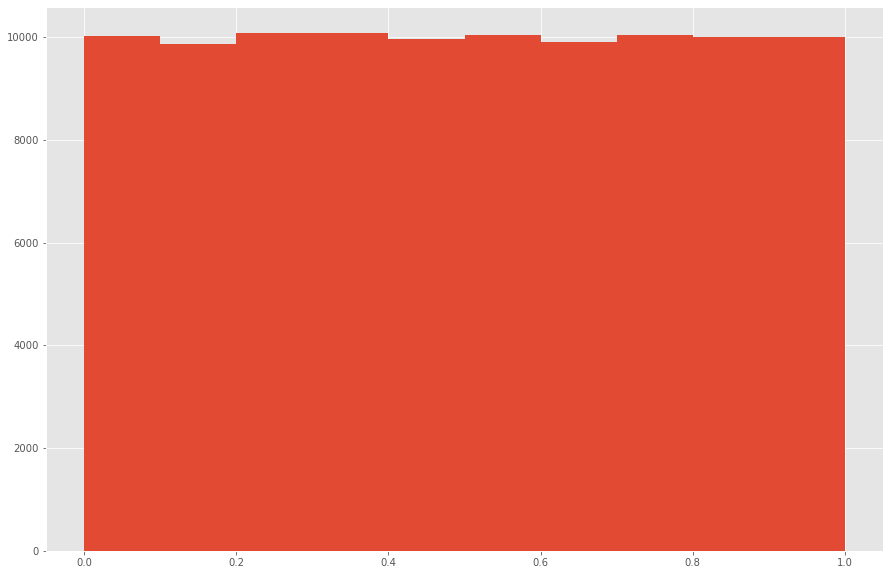

In [50]:
# Plotting a histogram to show the uniform distribution
hist_plot = rng.random(100000)
plt.hist(hist_plot)

(array([ 6., 11., 10.,  8.,  7.,  9., 12.,  9.,  9., 19.]),
 array([0.00799586, 0.10329585, 0.19859583, 0.29389581, 0.38919579,
        0.48449577, 0.57979575, 0.67509573, 0.77039571, 0.86569569,
        0.96099567]),
 <BarContainer object of 10 artists>)

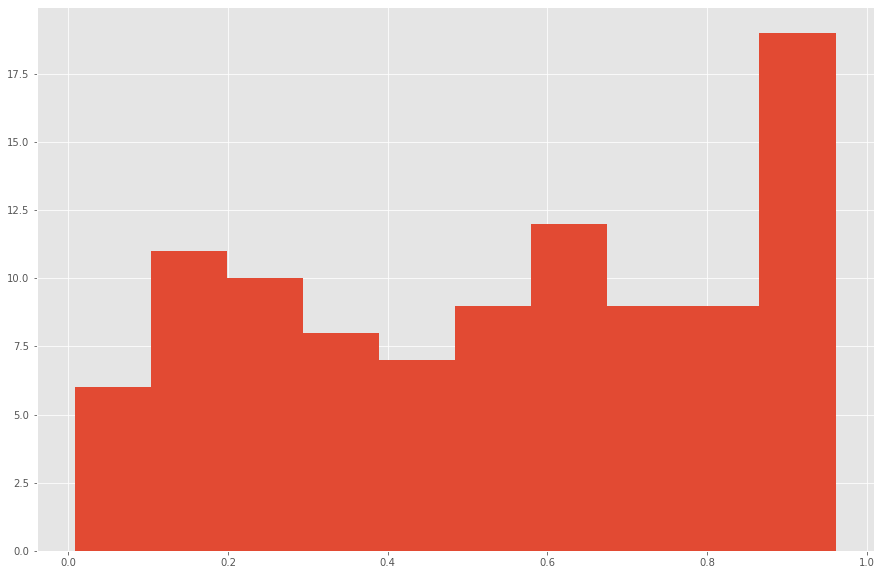

In [53]:
plt.hist(h)

#### rng.choice

The rng.choice method is used to get a random value from an array. It is used with one dimensional array and returns a new numpy array with randomly chosen values [9].


In [60]:
rng.ranf(2)

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'ranf'

![img](images/matrix.png)

In [257]:
# Retuning a random value from an array
matrix = ['red pill', 'blue pill']

![img](images/matrix.png)

In [258]:
print(rng.choice(matrix))

blue pill


In [259]:
# Returning a random interger between 0 - 9
rng.random(10)

array([0.55688381, 0.4906371 , 0.59799714, 0.72957862, 0.52474061,
       0.56303822, 0.49178388, 0.615207  , 0.24812722, 0.55261343])

In [260]:
# An array of 5 random intergers between 0 and 6
x = np.random.choice(10, 5000)

In [329]:
prob

array([2, 2, 3, 1, 0, 0, 3, 1, 2, 3, 1, 1, 2, 3, 2, 0, 0, 3, 3, 3, 3, 1,
       0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 0, 3, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 2, 3, 2, 3, 2, 0, 3,
       0, 3, 2, 0, 3, 2, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2], dtype=int64)

In [28]:
x

array([6, 4, 9, ..., 3, 9, 8])

In [331]:
# Probability of each element of in the array can also be set
prob = rng.choice(5, 100, p =[0.2, 0.1, 0.3, 0.4, 0]) # a and p must be the same size.


#### rng.bytes

This function outputs a string equalling the parameter(lenght) passed to it.

In [332]:
# Generates a string of 3 random bytes
rng.bytes(3)

b'\xd5\xf6('

In [19]:
x = np.random.randn(10000)

(array([  22.,  138.,  701., 1818., 2920., 2585., 1319.,  406.,   77.,
          14.]),
 array([-3.66226761, -2.89986649, -2.13746537, -1.37506426, -0.61266314,
         0.14973798,  0.9121391 ,  1.67454021,  2.43694133,  3.19934245,
         3.96174356]),
 <BarContainer object of 10 artists>)

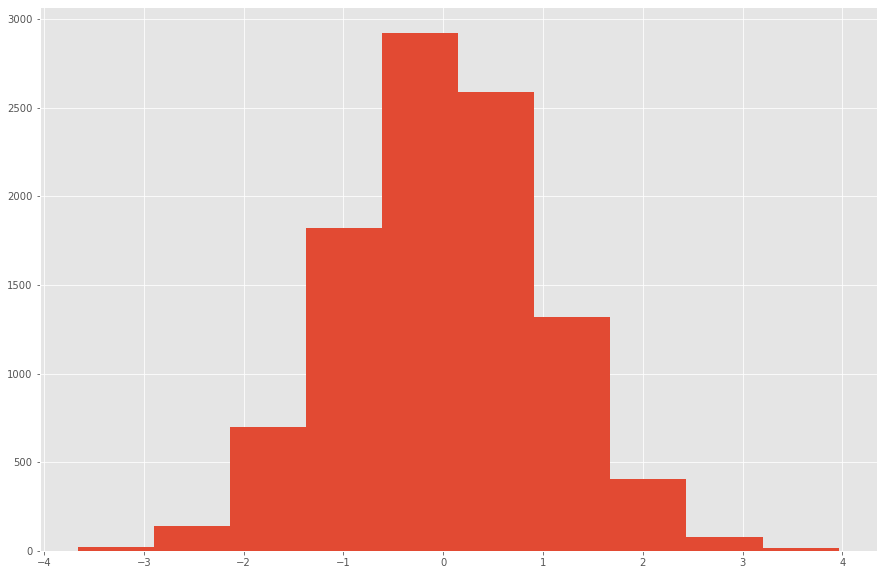

In [20]:
plt.hist(x)

In [253]:
rng.sample(3)

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'sample'

In [31]:

np.random.bytes(3)

b'Jk\xcd'



## Permutations


***

A permutation is the arrangement of its values into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements [11]. Randomly reordering an arragement of elements is refered to permutating [7]. A permutation refers to an arrangement of elements e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa. 

![img](images/permutations.png)

Within numpy.random there are two methods for permutation:

- Shuffle
- Permutation
- Permuted


#### rng.shuffle

This method changes(shuffles) the values in an array, in place.

##### random.shuffle

This method randomly reorders the elements of the array in place i.e. that original order is overwritten with the new order. random.shuffle only shuffles the array along the first axis (1D array).

In [78]:
# Creating a 1D array 
single = rng.integers(0, 10, 5)

In [ ]:
single

In [289]:
# Randomly shuffling the element of the single array
rng.shuffle(single)

In [82]:
# New arrangement of the single array
single

array([6, 2, 5, 5, 2], dtype=int64)

<br> For multi-demensional arrays, it shuffles the arrays in the matrix not their values.

In [301]:
# Creating a 3D array
multi = rng.integers(5, size=(3,5))

In [302]:
multi

array([[1, 0, 2, 2, 3],
       [2, 1, 0, 4, 0],
       [3, 4, 1, 0, 3]], dtype=int64)

In [284]:
# Randomly shuffling the 3D array
rng.shuffle(multi)

In [286]:
# New arrangement of the 3D array. *Note only order of matrixes changed
multi

array([[3, 4, 4, 2, 0],
       [2, 4, 3, 1, 1],
       [4, 2, 3, 0, 4]], dtype=int64)

<br>

#### rng.permutation

This method differs from random.shuffle in that it does not overwrite the orginal array, it returns a copy. Additionally, random.permutation does not shuffle in place i.e. it shuffles up to but not inculding the number passed to it. 

In [290]:
# Creating a randomly permuted array of elements up to 9
orignal = rng.permutation(10)

In [291]:
orignal

array([9, 6, 1, 3, 0, 4, 7, 8, 5, 2])

In [292]:
# Permutating the order of the orignal order
new = rng.permutation(orignal)

In [293]:
# A copy of the orginal array in a different order.
new

array([7, 3, 4, 2, 6, 1, 0, 9, 5, 8])

In [294]:
# Showing that the order of the orignal order has not changed.
orignal

array([9, 6, 1, 3, 0, 4, 7, 8, 5, 2])

#### rng.permuted

Unlike shuffle, each slice along the given axis is shuffled independently of the others [39]. If no axis is specified, it is automatically shuffled on the x-axis.


In [317]:
# Creating a 3d array
x =  rng.integers(5, size=(3,2))

In [318]:
x

array([[2, 0],
       [4, 1],
       [0, 1]], dtype=int64)

In [319]:
# Shuffling on the x-axis
rng.permuted(x)

array([[1, 4],
       [1, 0],
       [0, 2]], dtype=int64)

In [320]:
# Shuffling on the y-axis
rng.permuted(x,axis=1)

array([[0, 2],
       [4, 1],
       [1, 0]], dtype=int64)

<br>

***

## Distributions

***

The distribution of data obtained from a sample is pivitol in understanding how to analyse it. Probability distributions one of the corner stones of statistics. Understanding which probability distribution function fits your data is important for analysis. There are different probability distributions for different types of data. 
At the highest level, data can be broadly classified into 2 groups[11]:

- Qualitative/Categorical data: This is data which answers questions such as "what type?". It deals with traits, characteristics, judgements and descriptions. e.g. male or female. Qualitative data contains subtypes. Nominal data, this is data that doesn't follow a pattern or sequence e.g. hair colour. The other subtype is ordinal data. This data can be ranked in decending or ascending order e.g. tooth pain on a scale of pain. This can be refered to binary data if only two cateogries are present e.g. yes/no. If there is more than two categories it is non binary data e.g. yes/no/maybe. [11].

- Quantitative/Numerical data: is data which deals with objective measurements. e.g. height. It is data which can be counted. Quantitative data can be broken down into discrete data. This is data which is represented in whole numbers e.g. how many people are in the crowd. Continuous data is data which can take any value within a range e.g. a person height can be any value within the range of human heights [11]


The 5 distributions we will look deeper at are: 

- Normal Distribution
- Poisson Distribution
- Binomial Distribution
- Logistic Distribution
- Uniform Distribution

***
#### Poisson Distribution
***
Named after after French mathematician Siméon Denis Poisson, the Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.[12]  When the total number of occurrences of the event is unknown, we can think of it as a random variable. This random variable follows the Poisson Distribution. The Poisson distribution is a limiting case of the Binomial distribution when the number of trials becomes very large and the probability of success is small [13]. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

Features of a Poisson Process:
- The important point is we know the average time between events but they are randomly spaced (stochastic). We might have back-to-back failures, but we could also go years between failures due to the randomness of the process.
- A Poisson Process meets the following criteria (in reality many phenomena modeled as Poisson processes don’t meet these exactly):
- Events are independent of each other. The occurrence of one event does not affect the probability another event will occur.
- The average rate (events per time period) is constant.
- Two events cannot occur at the same time [13]


Examples:The number of patients arriving in an emergency room between 10 and 11 pm, Vistors to a website, calling a helpline.

We need to apply the Poisson Distribution to a Poisson Process to do interesting things like finding the probability of a number of events in a time period or finding the probability of waiting some time until the next event.

![img](images/poisson.PNG)


- k: The number of occurrences of an event for which poisson distribution has to be found
- λ: The expected number of event occurrences in the given interval
- e: It is the Euler’s constant whose approximate value is 2.72.

Parameters:

- lam: It is a float value or an array of float values. The lam corresponds to the λ value in the poisson distribution formula. It denotes the expected number of event occurrences for a given time interval. Its value should be greater than or equal to zero since no event can occur a negative amount of times.

- size: It is an optional parameter whose default value is ‘None’. For None, it will return a single value as a sample. If you pass any (x,y) value, then x * y samples will be drawn from the poisson distribution. If any other value n is passed, then n samples would be drawn from it. [14]

In [86]:
# The frequency an event will occur 5 times.
x = rng.poisson(5)

In [87]:
x

5

Text(0, 0.5, 'Frequency')

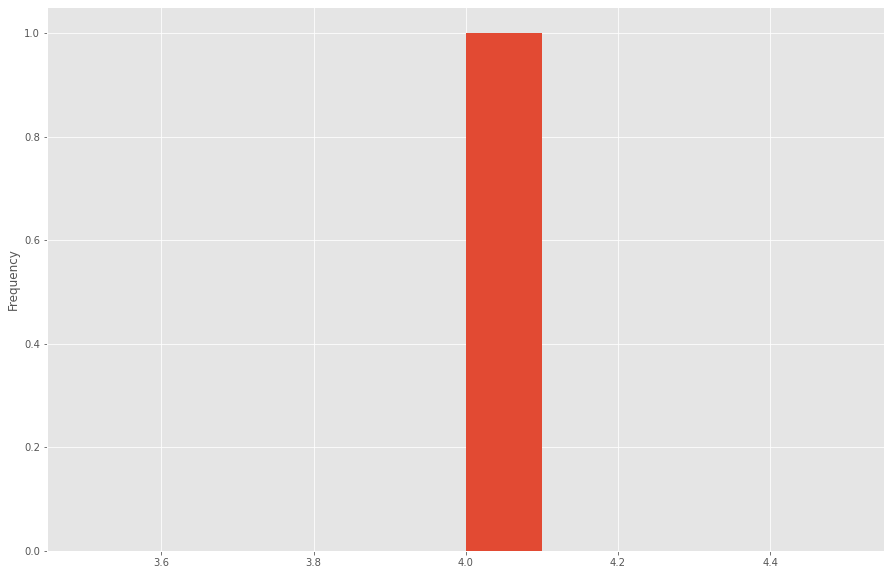

In [47]:
# Plotting y
plt.hist(x)
plt.ylabel("Frequency") # Label the y axis

In [88]:
# Adding a size of 20. This means 20 samples will be taken.
y = rng.poisson(5, 100)

In [89]:
y

array([ 5,  6,  9, 10,  5,  3,  6,  5,  5,  6,  5,  4,  8,  4,  7,  5,  2,
        3,  1,  2,  4,  7,  3,  4, 11,  6,  2,  7,  5,  3,  6,  1,  5,  2,
        9,  2,  3,  1,  1,  7,  3,  4,  3,  6,  4,  4,  6,  6,  7,  2,  3,
        6,  6,  4,  1,  4,  5, 10,  4,  2,  2,  1,  8,  6,  9,  3,  5,  6,
        5,  3,  3,  3,  3,  8, 10,  8,  4,  1,  2,  8,  7,  0,  4,  2,  5,
        7,  3,  4,  6,  4,  6,  6,  7,  6,  5,  2,  4,  4,  3,  7],
      dtype=int64)

Text(0, 0.5, 'Frequency')

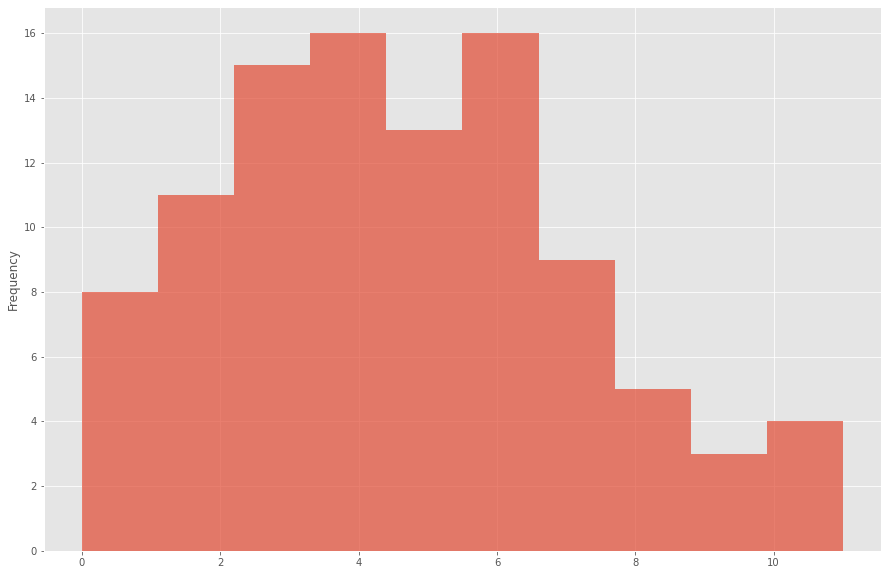

In [334]:
# Plotting x
plt.hist(y, alpha=0.7)
plt.ylabel("Frequency") # Label the y axis

<br>
The same method can be applied to multidimensional arrays.

In [354]:
# Generating a multi dimeensional array with 16 samples to draw
z = rng.poisson(2, (4, 4))

In [355]:
z

array([[3, 5, 2, 1],
       [2, 2, 4, 0],
       [1, 0, 1, 2],
       [2, 5, 1, 1]], dtype=int64)

Text(0, 0.5, 'Frequency')

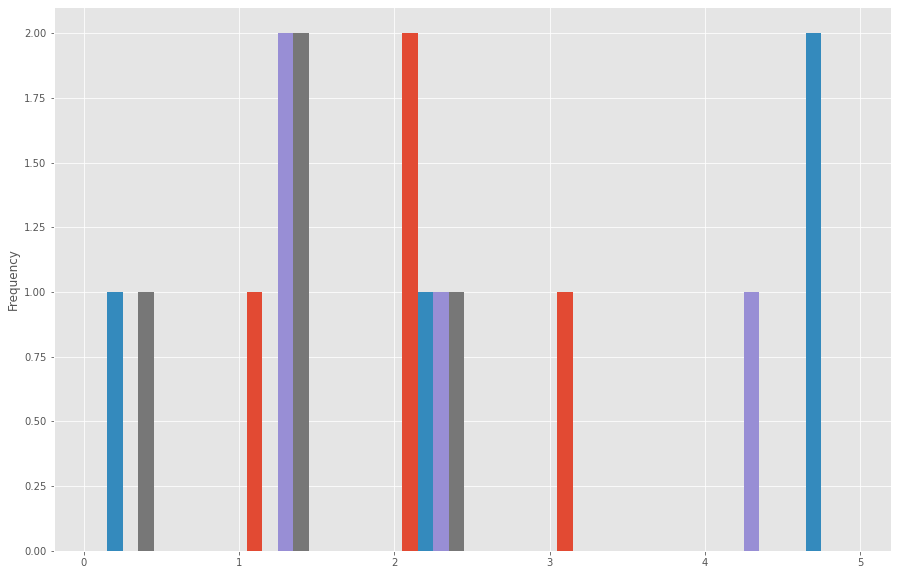

In [357]:
plt.hist(z, bins=10)
plt.ylabel("Frequency") # Label the y axis

In [342]:
# Mean of samples drawn
z.mean()

2.2222222222222223

In [91]:
q = rng.poisson(5, 10000)

In [56]:
q

array([2, 4, 4, ..., 7, 8, 6])

(array([ 387., 2169., 1776., 3255., 1070.,  998.,  285.,   38.,   18.,
           4.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

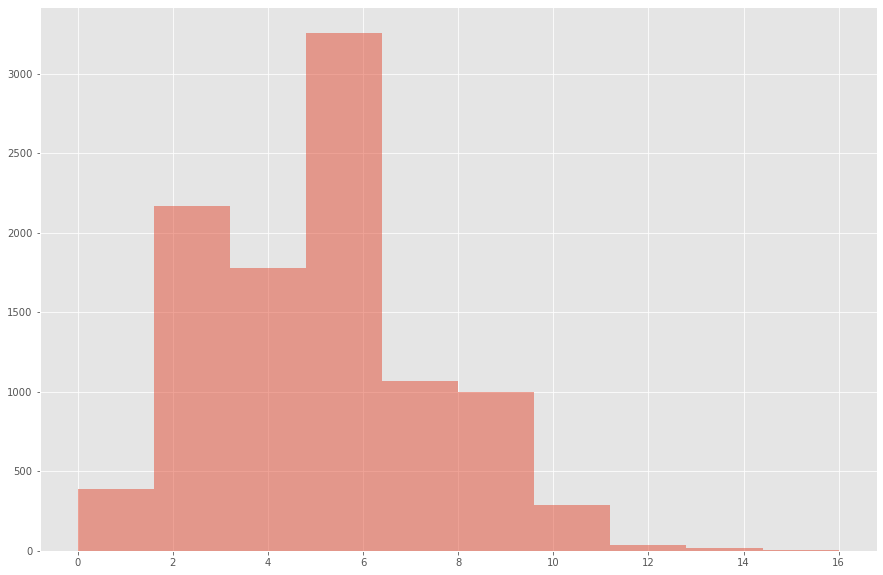

In [57]:
plt.hist(q, alpha=0.5)

In [58]:
q.mean()

5.0373

We can also draw an equal amount of samples for two different values of lam, simultaneously. In this example, we shall be drawing 20 different sample values for two values of lam: λ = 10 and λ = 100. We will be passing lam argument in the form of (10,100) [14].

In [358]:
# Code taken from pythonpool
r = rng.poisson((10, 100), (20,2))

In [359]:
r

array([[  9,  91],
       [ 14, 116],
       [  8,  94],
       [ 11,  93],
       [ 11, 110],
       [ 13,  87],
       [ 11,  99],
       [  8, 101],
       [  8,  95],
       [ 11, 118],
       [ 15, 105],
       [ 10, 108],
       [ 12, 108],
       [ 13,  90],
       [ 12,  95],
       [ 10,  88],
       [ 10, 108],
       [ 12, 103],
       [ 11, 105],
       [  9,  86]], dtype=int64)

(array([[20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  6.]]),
 array([  8.,  19.,  30.,  41.,  52.,  63.,  74.,  85.,  96., 107., 118.]),
 <a list of 2 BarContainer objects>)

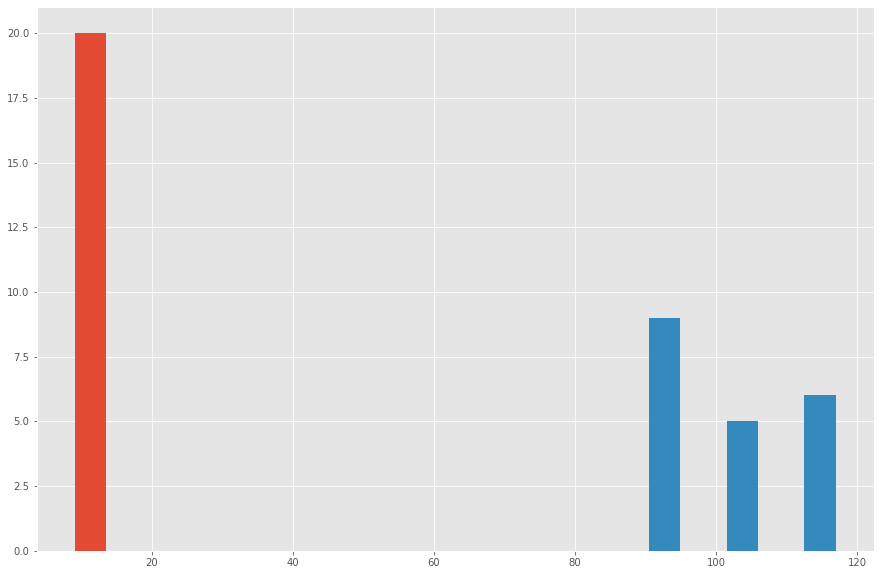

In [360]:
plt.hist(r)

***
#### Binomial Distribution

A binomial distribution derived from Bernoulli Process, can be thought of as probability of a success or failure outcome in an experiment which is repeated numerous times. The binomial distribution assumes that each experinment/event is independant of each other and that only two outcomes came occur, hence the word bi [15]. An example would be flipping a coin. The result can only be heads or tails, the chance of either appear is even. 

![img](images/binomial.PNG)


- x: total number of successes
- P: probability of a success in an individual trail
- n: number of trails


Parameters:

- n: number of trials.
- p: probability of occurence of each trial (e.g. for toss of a coin 0.5 each).
- size: - The shape of the returned array. If size is None (default), a single value is returned if n and p are both scalars.

Each result has a predefined probability of success. For a large number of repetition (size) and equal probability of winning (p=0.5) - e.g. coin toss - the result resembles a normal distribution.

Binomial distributions must also meet the following criteria:

- The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times. This is common sense—if you toss a coin once, your probability of getting a tails is 50%. If you toss a coin a 20 times, your probability of getting a tails is very, very close to 100%.
- Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
- The probability of success (tails, heads, fail or pass) is exactly the same from one trial to another [16].
 

 
Once you know that your distribution is binomial, you can apply the binomial distribution formula to calculate the probability 

In [93]:
# Results of flipping a coin 10 trails, with an even probabilty, tested 10000 times
coin_toss = rng.binomial(n=10, p=0.5, size=100000)

![img](images/coin.jpg)

In [63]:
coin_toss

array([4, 6, 6, ..., 4, 4, 6])

Text(0.5, 0, '# of Trials')

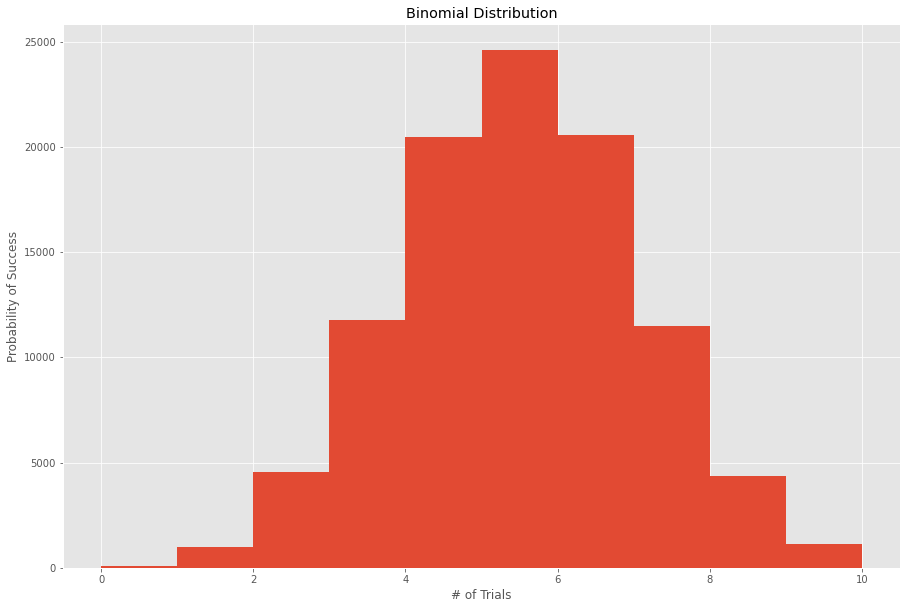

In [64]:
# Plotting the coin toss results
plt.hist(coin_toss)

plt.title('Binomial Distribution') # Adding a title
plt.ylabel("Probability of Success") #  y axis label
plt.xlabel('# of Trials') # x axis label

In [65]:
# Mean of the coin toss experiment 
coin_toss.mean()

4.98972

As expected, around under half the time you choose heads or tails you will be correct. This is to be expected where probaility=0.5. When success and failure are equally likely, the binomial distribution is a normal distribution. Hence, changing the value of p to 0.5, we obtain this graph, which is identical to a normal distribution plot [16].

If the probability of success is less than 0.5, the distribution is positively skewed i.e. the probabilities for x is greater for values below the expected value than above it.

And if the probability of success is greater than 0.5, the distribution is negatively skewed — i.e. probabilities for X are greater for values above the expected value than below it [17].


In [94]:
# Results of flipping a coin 10 trails, with a skewed probabilty, tested 10000 times
pos = rng.binomial(n=10, p=0.2, size=100000)

In [67]:
pos

array([1, 3, 4, ..., 3, 2, 2])

Text(0.5, 0, '# of Trials')

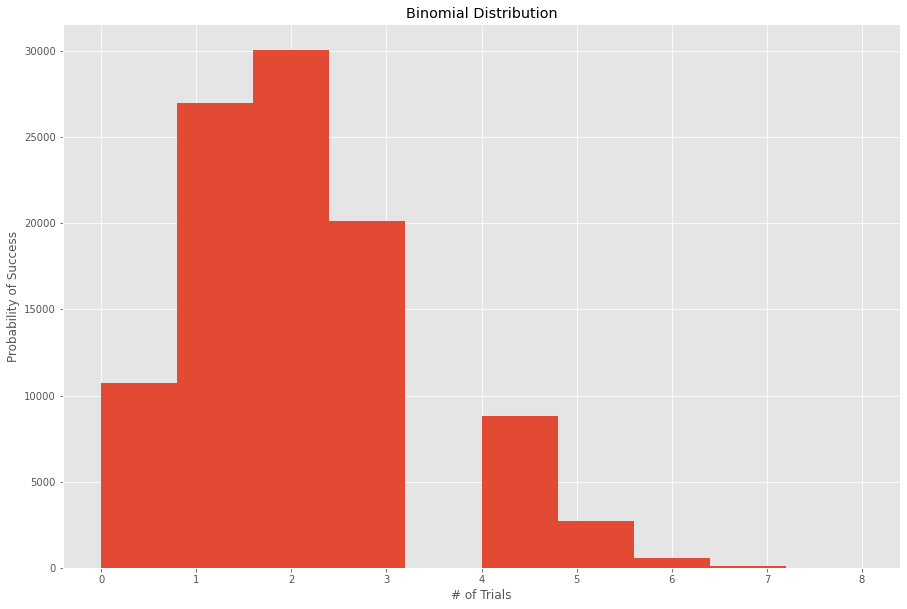

In [68]:
# Plotting the coin toss results
plt.hist(pos)

plt.title('Binomial Distribution') # Adding a title
plt.ylabel("Probability of Success") #  y axis label
plt.xlabel('# of Trials') # x axis label

In [69]:
# Mean of pos
pos.mean()

1.99986

In [95]:
# Results of flipping a coin 10 trails, with a skewed probabilty, tested 10000 times
neg = rng.binomial(n=10, p=0.8, size=100000)

In [96]:
neg

array([ 8,  8, 10, ...,  9,  8,  9], dtype=int64)

Text(0.5, 0, '# of Trials')

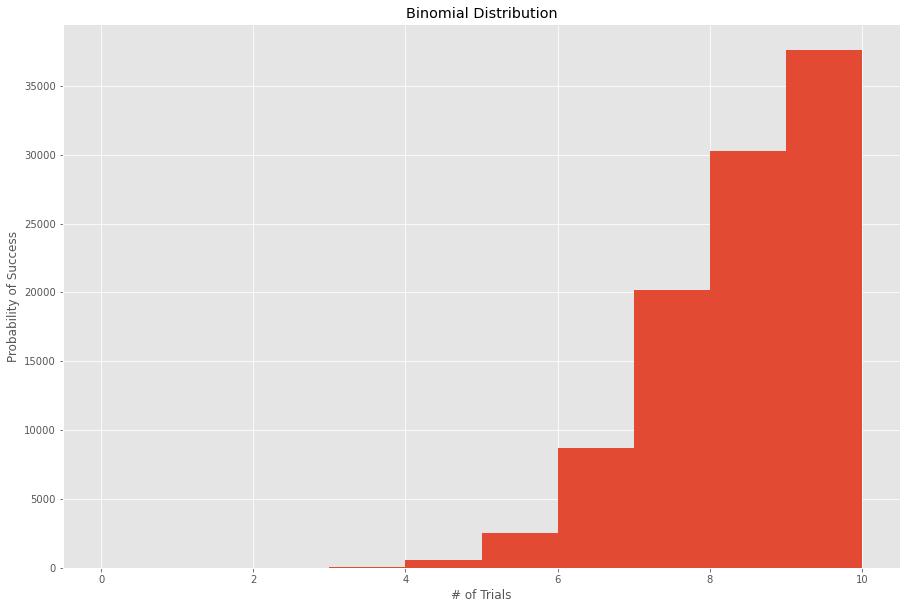

In [72]:
# Plotting the coin toss results
plt.hist(neg)

plt.title('Binomial Distribution') # Adding a title
plt.ylabel("Probability of Success") #  y axis label
plt.xlabel('# of Trials') # x axis label

In [73]:
neg.mean()

8.00555

The differences between binomial and poisson distribution can be drawn clearly on the following grounds:

- The binomial distribution is one in which the probability of repeated number of trials is studied. A probability distribution that gives the count of a number of independent events occur randomly within a given period, is called probability distribution.
- Binomial Distribution is biparametric, i.e. it is featured by two parameters n and p whereas Poisson distribution is uniparametric, i.e. characterised by a single parameter m.
- There are a fixed number of attempts in the binomial distribution. On the other hand, an unlimited number of trials are there in a poisson distribution.
- The success probability is constant in binomial distribution but in poisson distribution, there are an extremely small number of success chances.
- In a binomial distribution, there are only two possible outcomes, i.e. success or failure. Conversely, there are an unlimited number of possible outcomes in the case of poisson distribution.
- In binomial distribution Mean > Variance while in poisson distribution mean = variance [19].

***

#### Uniform Distribution


A Uniform distribution refers to a type of probability distribution in which all outcomes are equally likely [19] e.g. rolling a dice, you have an equal chance of rolling 1 through 6. likely draw a heart, spade, diamond, clubs from a pack of cards.The concept of a uniform distribution, as well as the random variables it describes make up the skeleton of statistical analysis and probability theory.

![img](images/dice.png)


With the uniform distribution you provide the lower  and upper  bounds of the interval to specify the minimum (a) and maximum (b) possible values in the range. The smaller number provided will be taken as the lower bounds and the bigger number as the upper bound. Without providing an interval bounds, the function assumes a standard uniform distribution [20].

There are two types of uniform distributions: 

- Discrete: Discrete uniform distributions have a finite number of outcomes. i.e. each has outcome has the same probability of occuring. e.g. heads or tails, the finate is 2 outcomes on a coin, rolling a 6 sided dice - The possible values would be 1, 2, 3, 4, 5, or 6. In this case, each of the six numbers has an equal chance of appearing. Therefore, each time the 6-sided die is thrown, each side has a chance of 1/6. It is impossible to get a value of 1.3, 4.2, or 5.7 when rolling a fair die. However, if another die is added and they are both thrown, the distribution that results is no longer uniform because the probability of the sums is not equal [21].

![img](images/uniform_discrete.jpg)

- Continuous: A Continuous uniform/rectangular distribution is a statistical distribution with an infinite number of equally likely measurable values. Unlike discrete random variables, a continuous random variable can take any real value within a specified range. A good example of a continuous uniform distribution is an idealized random number generator. With continuous uniform distribution, just like discrete uniform distribution, every variable has an equal chance of happening. However, there is an infinite number of points that can exist [21].



![img](images/uniform_continuous.jpg)

The uniform distribution is defined by two parameters, a and b:

- Low: is the minimum.
- High: is the maximum. 
- Size: if size is None (default), a single value is returned if low and high are both scalars

When high == low, values of low will be returned. If high < low, the results are officially undefined and may eventually raise an error [22].

<br>

In [74]:
# If the range is not defined, by default is [0,1]
# A single random value in the interval [0,1]
np.random.uniform() 

0.6124785804947518

In [99]:
# Defining a range
# A single random value in the interval [-10,10]
rng.uniform(-10, 10) 

7.588162711048813

In [362]:
# An array of 20 values in the interval [5,10] 
rng.uniform(5,10,2000) 

array([8.78591273, 9.80060606, 9.67022141, ..., 7.59670611, 8.49463006,
       7.5169976 ])

In [363]:
# The probility of rolling a number on a 6 sided dice, if done 100000 times.
x = rng.uniform(1,7, 100000)

In [364]:
x

array([5.89945845, 1.57385773, 3.5427831 , ..., 3.88213494, 3.99168675,
       1.74273627])

(array([ 9945., 10007.,  9935.,  9920., 10034., 10128.,  9952., 10024.,
        10181.,  9874.]),
 array([1.00002603, 1.60000233, 2.19997864, 2.79995494, 3.39993125,
        3.99990755, 4.59988386, 5.19986016, 5.79983647, 6.39981277,
        6.99978908]),
 <BarContainer object of 10 artists>)

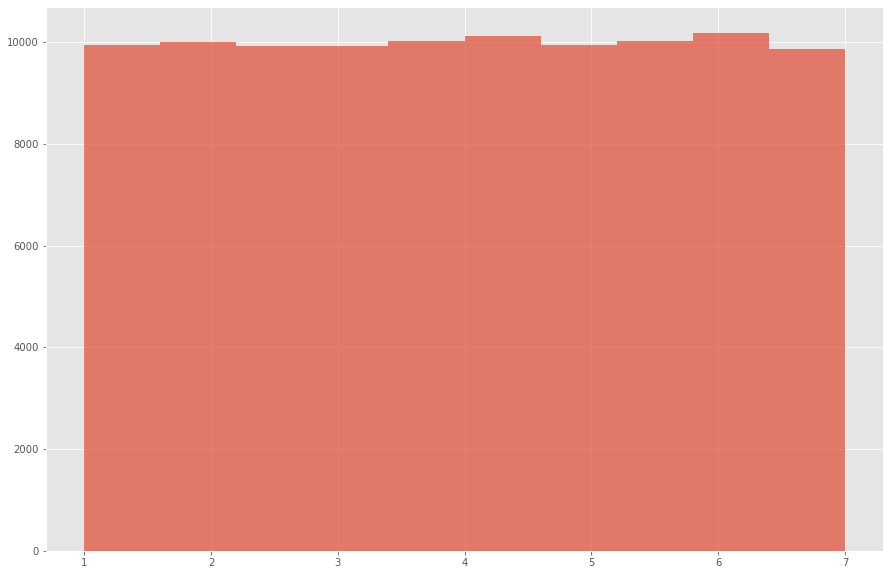

In [365]:
# Plotting
plt.hist(x, alpha=0.7)

<br>
As you can see from the above plot, it mimics a rectangular shape. This is the calling card of a A  uniform distribution. We are almost as equally likely to roll 1, 2, 3, 4, 5, 6 on the dice. The more samples, the more equally the histogram. In the below plot we'll use a smaller sample size to show the difference.

<br>


In [102]:
# The probility of rolling a number on a 6 sided dice, if done 10 times.
r = rng.uniform(1,7, 10)

In [81]:
r

array([2.45113381, 1.67770423, 5.46080591, 1.14000673, 5.96661576,
       5.61524935, 4.71537074, 2.67059221, 6.57447941, 5.16221675])

(array([2., 0., 2., 0., 0., 0., 1., 2., 2., 1.]),
 array([1.14000673, 1.683454  , 2.22690127, 2.77034854, 3.3137958 ,
        3.85724307, 4.40069034, 4.94413761, 5.48758488, 6.03103214,
        6.57447941]),
 <BarContainer object of 10 artists>)

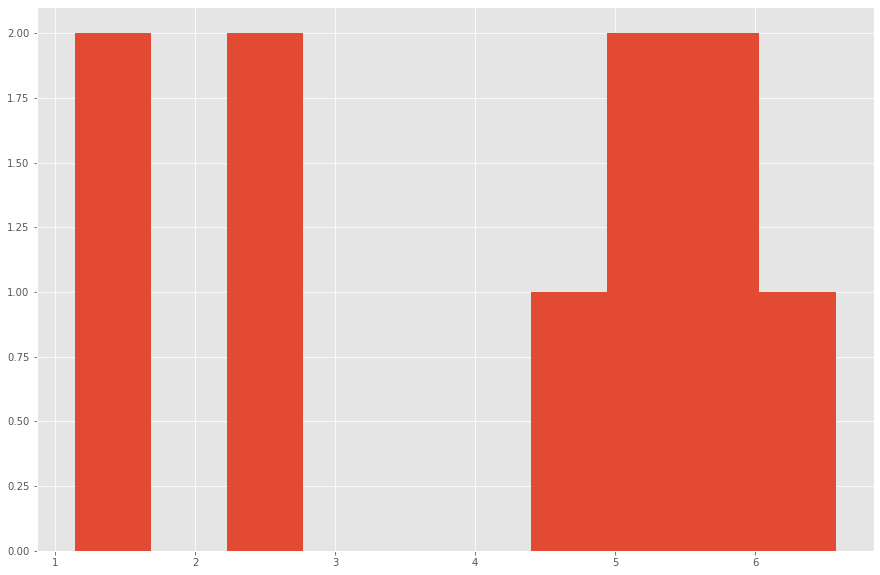

In [82]:
plt.hist(r)

***

### Normal Distribution

Normal distribution, also known as the Gaussian distribution,is a probability function used in statistics that tells about how the data values are distributed. It usually resembles a bell shaped curve. It is the most important probability distribution function used in statistics because of its advantages in real case scenarios. The normal distribution describes a common occurring distribution of samples influenced by a large or tiny, random distribution or which occurs often in nature [23]. For example, the height of the population. The normal distribution is symmetric about the mean i.e. showing that data near the mean are more frequent in occurrence than data far from the mean e.g. people are more likely to be in and around the average height than they are to be on the smaller or taller side.


![img](images/normal_distribution.PNG)


For a normal distribution, 68% of the observations are within +/- one standard deviation of the mean, 95% are within +/- two standard deviations, and 99.7% are within +- three standard deviations [24].

 ![img](images/normal_distribution_std.png) 

Characteristics of a normal distribution:
 - mean = median = mode
 - The normal distribution is the only distribution whose cumulants beyond the first two (i.e., other than the mean and variance) are 0
 - The mean is 0 and the standard deviation is 1 and has 0 skew.
 - 50% of values less than the mean and 50% greater than the mean
 - While normal distributions are symmetrical, not all symmetrical distributions are normal [25].
 

The standard normal distribution has three parameters (none are mandatory): 

- loc: the mean
- scale: the standard deviation
- size: Output shape. If the given shape, if size is None (default), a single value is returned if loc and scale are both scalars


In [103]:
# Creating an array of heights within normal distribution from 100,000 samples
height = rng.normal(1.75, 0.15, 100000)

In [84]:
height

array([1.89745835, 1.71069397, 1.81036299, ..., 1.75170491, 1.77663565,
       1.92140948])

In [85]:
# Smallest persons height
height.min()

1.0542313258428222

In [86]:
# The tallest persons height
height.max()

2.3717655344488344

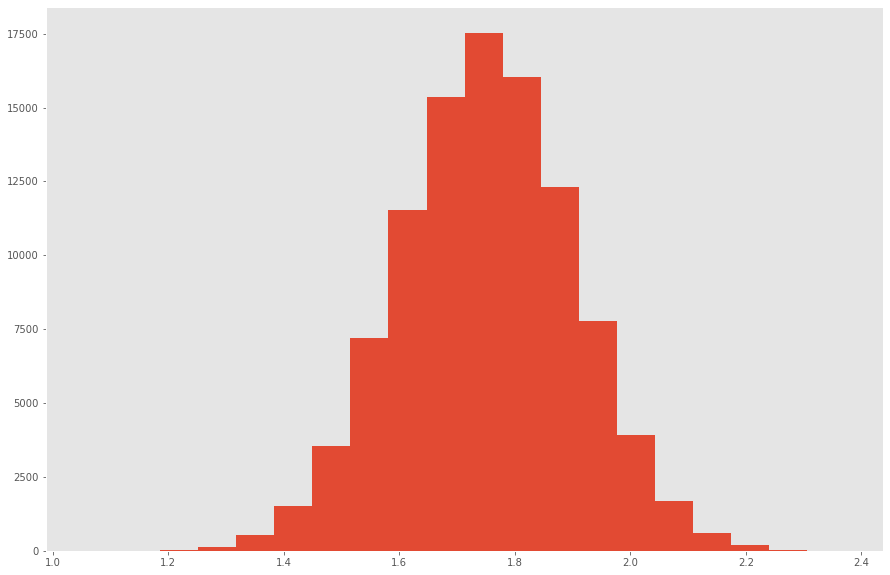

In [87]:
# Plotting the height sample
plt.hist(height, bins=20)
plt.grid()

As we can see from the histogram above, it creates a bell shape. 50% of values are either side of the 1.75 mean. And the majority of those sampled fall within the average height, 1.75m.

***

#### Logistic Distribution

Logistic distribution is a continuous probability distribution. It's cumulative distribution function is the logistic function which appears in logistic regression and feedforward neural networks. It is used for modeling growth, and also used in logistic regression. It is a symmetrical distribution, unimodal (it has one peak) and is similar in shape to the normal distribution. Logistic distribution is used for sports and recently finanical modelling [26]. 

Some argue that the logistic distribution isn't the right choice for modeling lifetime data as the left-hand limit of the distribution extends into negative infinity. This could result in modeling negative times-to-failure. However, provided that the distribution in  has a relatively high mean and a relatively small location parameter, the issue of negative failure times should not be a problem [27].

![img](images/logistic_distribution.jpg)

Parameters of Logistic distribution:

- The location parameter (μ) tells you where it’s centered on the x-axis.
- The scale parameter (σ) tells you what the spread is. In the above equation, s is a scale parameter proportional to the standard deviation [28].



In [104]:
# Generating a array of random numbers in the logistic distribution
x = rng.logistic(20, 20 ,size=10000)

In [89]:
x

array([ 97.65629485, -21.50634989,  19.26615875, ...,  51.0398627 ,
        24.67923846,  23.36389366])

(array([2.000e+00, 2.000e+00, 4.000e+00, 2.100e+01, 4.900e+01, 1.240e+02,
        2.930e+02, 6.180e+02, 1.230e+03, 1.823e+03, 2.129e+03, 1.742e+03,
        1.037e+03, 5.180e+02, 2.360e+02, 1.050e+02, 3.800e+01, 1.600e+01,
        6.000e+00, 7.000e+00]),
 array([-162.64494648, -145.06810359, -127.4912607 , -109.91441781,
         -92.33757493,  -74.76073204,  -57.18388915,  -39.60704626,
         -22.03020337,   -4.45336048,   13.1234824 ,   30.70032529,
          48.27716818,   65.85401107,   83.43085396,  101.00769685,
         118.58453974,  136.16138262,  153.73822551,  171.3150684 ,
         188.89191129]),
 <BarContainer object of 20 artists>)

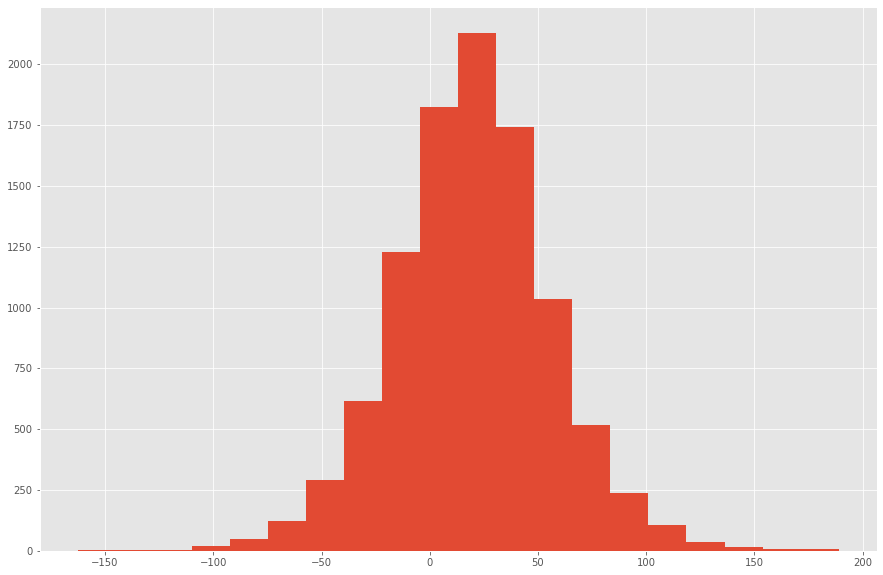

In [90]:
# PLotting the array
plt.hist(x, bins =20)

Logistic distributiont is symmetrical, unimodal i.e. has one peak and is very similar in shape to the the normal distribution. The major distingushing characteristic between the two distributions is that, the logistic distribution has wider tails than a normal distribution so it is more consistent with the underlying data and provides better insight into the likelihood of extreme events [29]. Let's visualise the difference below. 


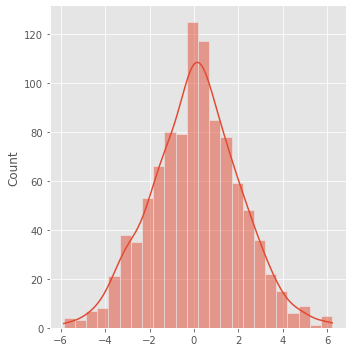

In [108]:
# Following two pieces of code are taken from W3 schools
# Normal distribution 

a = sns.displot(rng.normal(scale=2, size=1000), label='normal', kde=True)

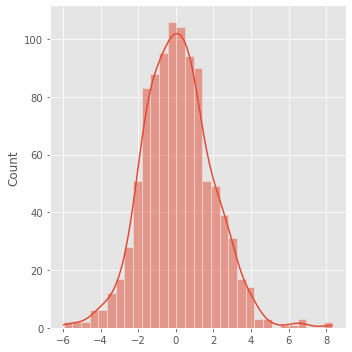

In [105]:
# Logistic distribution
b = sns.displot(rng.logistic(size=1000), label='logistic', kde= True)

As we can see from the above, both distributions are almost identical, but the logistic distribution has more area under the tails. This means that it can show more possibility of an occurence of an events further away from mean.


***

## Seed

***

The methods commonly used to generate random numbers is not a truly random processes. True randomness is hard to achieve, so we employ pseudorandomness instead. This numbers are refered to as psuedo-random numbers. While pseudorandom numbers appear to be genuinely random, they are  generated by a deterministic process i.e. a system in which no randomness is involved. This is because computers are deterministic and follow instructions to the low. If you give a certain input, it will percisely follow instruction. Hence the use of psuedo-random number gerenators [30]. 

A random number generator is an algorithm that, based on an initial seed, produces a sequence of seemlying random numbers[31].

The generated sequence is not truly random, because it is determined by the initial seed value. The numbers they produce have properties that approximate the properties of random numbers. Although, these numbers are decided by an algorithm, for the most part there is no pattern in their choosing, hence making them appear truly random.

Psuedo-Random numbers (PRNG) and random  bit  generators(RGB) are fundamental in many areas. In  stochastic simulation, PRNGs  are employed to copy the behavior of a random  variable  with a  given probability distribution [32]. PRNGs are algorithms that use mathematical formulae or simply precalculated tables to produce sequences of numbers that appear random. 

Characteristics of PRNG:

- Efficient: PRNG can produce many numbers in a short time and is advantageous for applications that need many numbers
- Deterministic: A given sequence of numbers can be reproduced at a later date if the starting point in the sequence is known.Determinism is handy if you need to replay the same sequence of numbers again at a later stage.
- Periodic: PRNGs are periodic, which means that the sequence will eventually repeat itself. While periodicity is hardly ever a desirable characteristic, modern PRNGs have a period that is so long that it can be ignored for most practical purposes [30].


#### (PCG-64) Seed Examples
[PCG-64 Seed Documentation]('https://numpy.org/doc/stable/reference/random/generator.html')

In [220]:
# Randomly setting the seed
rng = np.random.default_rng(seed=0)
rng

Generator(PCG64) at 0x1E72793A740

In [221]:
# Randomly generating 10 numbers between 0 - 4
rng.integers(0,5,10)

array([4, 3, 2, 1, 1, 0, 0, 0, 0, 4], dtype=int64)

In [222]:
# Repeating the above generation with a randomly set seed
rng.integers(0,5,10)

array([3, 4, 2, 3, 4, 3, 3, 2, 2, 4], dtype=int64)

As we can see from the above there is seemingly no pattern in both arrays. This is a result of leaving the seed blank. 

But pseudo-random numbers can be replicated exactly. PRNG's are repeatable because of their deterministic nature. This is often used when testing or sharing code [30].

np.random.default_rng allows us to determine the vaule of the seed which generates these pseudo-random numbers. Let's reapeat the above code but, this time assigning a vaule to the seed

In [235]:
# Setting the seed as 5
rng = np.random.default_rng(seed=5)

# Randomly generating 10 numbers between 0 - 4
a = rng.integers(0,5,10)

In [236]:
a

array([3, 4, 0, 4, 2, 2, 3, 1, 4, 0], dtype=int64)

In [237]:
# Repeating the above generations 
rng = np.random.default_rng(seed=5)
b = rng.integers(0,5,10)

In [238]:
b

array([3, 4, 0, 4, 2, 2, 3, 1, 4, 0], dtype=int64)

By specifying a seed in the above examples, it enables us to replicate the results.

#### Legacy (MT19937) Seed Examples

[MT19937 Seed Documentation]('https://numpy.org/doc/stable/reference/random/generator.html')

In [137]:
# Randomly setting the seed
np.random.seed()

In [138]:
# Randomly generating 10 numbers between 0 - 4
np.random.randint(0,5,10)

array([4, 2, 2, 4, 0, 3, 3, 3, 0, 2])

In [94]:
# Repeating the above generation
# Randomly setting the seed
np.random.seed()

# Randomly generating 10 numbers between 0 - 4
np.random.randint(0,5,10)

array([3, 3, 4, 2, 2, 3, 2, 4, 1, 1])

In [95]:
# Setting the seed as 5
np.random.seed(5)
# "Randomly" generating 10 numbers between 0 - 4
np.random.randint(0,5,10)

array([3, 0, 1, 0, 4, 3, 0, 0, 4, 1])

In [96]:
# Repeating the above generation
np.random.seed(5)
np.random.randint(0,5,10)

array([3, 0, 1, 0, 4, 3, 0, 0, 4, 1])

***

### References

***

[1].	What is NumPy? — NumPy v1.21 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/stable/user/whatisnumpy.html
 	 
[2]	Pajankar A. Introduction to NumPy. In: Raspberry Pi Supercomputing and Scientific Programming. Berkeley, CA: Apress; 2017. p. 109–28.
 	 
[3].	Bisong E. NumPy. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Berkeley, CA: Apress; 2019. p. 91–113.
 	 
[4]	Python R. NumPy tutorial: Your first steps into data science in Python [Internet]. Realpython.com. Real Python; 2021 [cited 2021 Oct 19]. Available from: https://realpython.com/numpy-tutorial/
 	 
[5]	Wikipedia contributors. Applications of randomness [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Applications_of_randomness&oldid=1016893073
 	 
[6]	Random Numbers in NumPy [Internet]. W3schools.com. [cited 2021 Oct 19]. Available from: https://www.w3schools.com/python/numpy/numpy_random.asp
 	 
[7]	McKinney W. Python for Data Analysis: Data wrangling with pandas, NumPy, and IPython. Sebastopol, CA: O’Reilly Media; 2012.
 	 
[8]	Differences between numpy.random.rand vs numpy.random.randn in Python [Internet]. Stackoverflow.com. [cited 2021 Oct 19]. Available from: https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python
 	 
[9]	Lohana A. NumPy Random Choice: How to use it? [Internet]. Codeleaks.io. 2021 [cited 2021 Oct 19]. Available from: https://www.codeleaks.io/numpy-random-choice-python/
 	 
[10]	Wikipedia contributors. Permutation [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Permutation&oldid=1050569920
 	 
[11]	Ranganathan P, Gogtay NJ. An Introduction to Statistics - Data Types, distributions and Summarizing Data. Indian J Crit Care Med. 2019;23(Suppl 2):S169–70.
 	 
[12]	M SL, T TM, F HS, editors. Poisson Distribution. Betascript Publishing; 2013.
 	 
[13]	Koehrsen W. The Poisson distribution and Poisson process explained [Internet]. Towards Data Science. 2019 [cited 2021 Oct 19]. Available from: https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459
 	 
[14]	Diving into python’s numpy random Poisson [Internet]. Pythonpool.com. 2021 [cited 2021 Oct 19]. Available from: https://www.pythonpool.com/numpy-random-poisson/
 	 
[15]	Binomial Distribution: Formula, What it is, How to use it [Internet]. Statisticshowto.com. 2018 [cited 2021 Oct 19]. Available from: https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
 	 
[16]	Python - Binomial Distribution - GeeksforGeeks [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Oct 19]. Available from: https://www.geeksforgeeks.org/python-binomial-distribution/
 	 
[17]	How to Graph the Binomial Distribution - dummies [Internet]. Dummies.com. 2016 [cited 2021 Oct 19]. Available from: https://www.dummies.com/education/math/business-statistics/how-to-graph-the-binomial-distribution/
 	 
[18]	Surbhi S. Difference between binomial and Poisson distribution [Internet]. Keydifferences.com. 2016 [cited 2021 Oct 19]. Available from: https://keydifferences.com/difference-between-binomial-and-poisson-distribution.html
 	 
[19]	Chen J. Uniform Distribution [Internet]. Investopedia.com. 2021 [cited 2021 Oct 19]. Available from: https://www.investopedia.com/terms/u/uniform-distribution.asp
 	 
[20]	Parametric continuous distributions [Internet]. Analytica.com. [cited 2021 Oct 19]. Available from: http://wiki.analytica.com/Parametric_continuous_distributions
 	 
[21]	Uniform distribution [Internet]. Corporatefinanceinstitute.com. 2020 [cited 2021 Oct 19]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
 	 
[22]	numpy.random.uniform — NumPy v1.16 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html
 	 
[23]	Wikipedia contributors. Normal distribution [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1049556144
 	 
[24]	Chen J. Normal Distribution [Internet]. Investopedia.com. 2021 [cited 2021 Oct 19]. Available from: https://www.investopedia.com/terms/n/normaldistribution.asp
 	 
[25]	Patel JK, B. C. Handbook of the normal distribution, second edition. 2nd ed. Boca Raton, FL: CRC Press; 1996.
 	 
[26]	Kissell R, Poserina J. Advanced Math and Statistics. In: Optimal Sports Math, Statistics, and Fantasy. Elsevier; 2017. p. 103–35.
 	 
[27]	ReliaSoft Publishing. Overview of the Gumbel, Logistic, Loglogistic and Gumbel distributions [Internet]. Weibull.com. [cited 2021 Oct 19]. Available from: https://www.weibull.com/hotwire/issue56/relbasics56.htm
 	 
[28]	Stephanie. Logistic distribution [Internet]. Statisticshowto.com. 2016 [cited 2021 Oct 19]. Available from: https://www.statisticshowto.com/logistic-distribution/
 	 
[29]	Logistic Distribution [Internet]. W3schools.com. [cited 2021 Oct 19]. Available from: https://www.w3schools.com/python/numpy/numpy_random_logistic.asp
 	 
[30]	Ebner J. NumPy random seed, explained [Internet]. Sharpsightlabs.com. 2019 [cited 2021 Oct 19]. Available from: https://www.sharpsightlabs.com/blog/numpy-random-seed/
 	 
[31]	Pseudo random number generator (PRNG) [Internet]. Geeksforgeeks.org. 2017 [cited 2021 Oct 19]. Available from: https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/
 	 
[32]	Vajargah BF, Asghari R. A novel pseudo-random number generator for cryptographic applications. Indian J Sci Technol. 2016;9(6):1–5.
 	  
[33]	Permuted Congruential Generator (64-bit, PCG64) — NumPy v1.21 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html
 	 
[34]	Wikipedia contributors. Permuted congruential generator [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Permuted_congruential_generator&oldid=999160939
 	 
[35]	Shema M. Seven deadliest web application attacks [Internet]. Syngress Publishing; 2010 [cited 2021 Oct 20]. Available from: https://www.sciencedirect.com/book/9781597495431/seven-deadliest-web-application-attacks
 	 
[36]	Wikipedia contributors. Mersenne Twister [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 20]. Available from: https://en.wikipedia.org/w/index.php?title=Mersenne_Twister&oldid=1049043226
 	 
[37]	Random sampling (numpy.random) — NumPy v1.18 Manual [Internet]. Numpy.org. [cited 2021 Oct 20]. Available from: https://numpy.org/doc/1.18/reference/random/index.html
 	 
[38]	Random Generator — NumPy v1.18 Manual [Internet]. Numpy.org. [cited 2021 Oct 20]. Available from: https://numpy.org/doc/1.18/reference/random/generator.html
 	 



#### Images

- [Numpy Logo](https://www.google.com/imgres?imgurl=https%3A%2F%2Ftwilio-cms-prod.s3.amazonaws.com%2Fimages%2Fjupyter_python_numpy.width-808.png&imgrefurl=https%3A%2F%2Fwww.twilio.com%2Fblog%2F2017%2F10%2Fbasic-statistics-python-numpy-jupyter-notebook.html&tbnid=J-fIWc88mja7tM&vet=12ahUKEwjhxO29p9fzAhUSWhUIHVGKDuQQMygJegUIARDCAQ..i&docid=VNux2Dk9hmRbWM&w=800&h=200&itg=1&q=numpy%20logo&ved=2ahUKEwjhxO29p9fzAhUSWhUIHVGKDuQQMygJegUIARDCAQ)
 	
- [PCG vs MT19937 ](https://www.pcg-random.org/index.htmlhttps://www.pcg-random.org/index.html)
 	
- [Permutations](https://www.w3resource.com/w3r_images/csharp-recursion-image-exercise-11.png)
 	
- [Matrix](https://3xedigital.com/wp-content/uploads/2016/03/Red-Pill-Vs-Blue-Pill.png)
 	
- [Coin](https://www.google.com/url?sa=i&url=https%3A%2F%2Ffree3d.com%2F3d-model%2F2-euro-coin-italy-4150.html&psig=AOvVaw3914ZDmMJJRuMCZL_bZdBl&ust=1634761631572000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPjQmeen1_MCFQAAAAAdAAAAABAL)
 	
- [Dice](https://static.wikia.nocookie.net/game-of-dice/images/c/cb/White_Dice.png/revision/latest?cb=20160113233423)
 	
- [Std Rule](https://blogs.sas.com/content/iml/files/2019/07/rule6895.png)

***

# End

***